In [ ]:
#import firstStrategy

In [ ]:
#firstStrategy.trading_bot(1063)

In [1]:
import strategies

In [ ]:
strategies.SMA20to50('ETH-USD', 50)
strategies.SMA20to50('BTC-USD', 1000)
strategies.SMA20to50('AAPL', 5)
strategies.SMA20to50('TSLA', 15)

[*********************100%%**********************]  1 of 1 completed


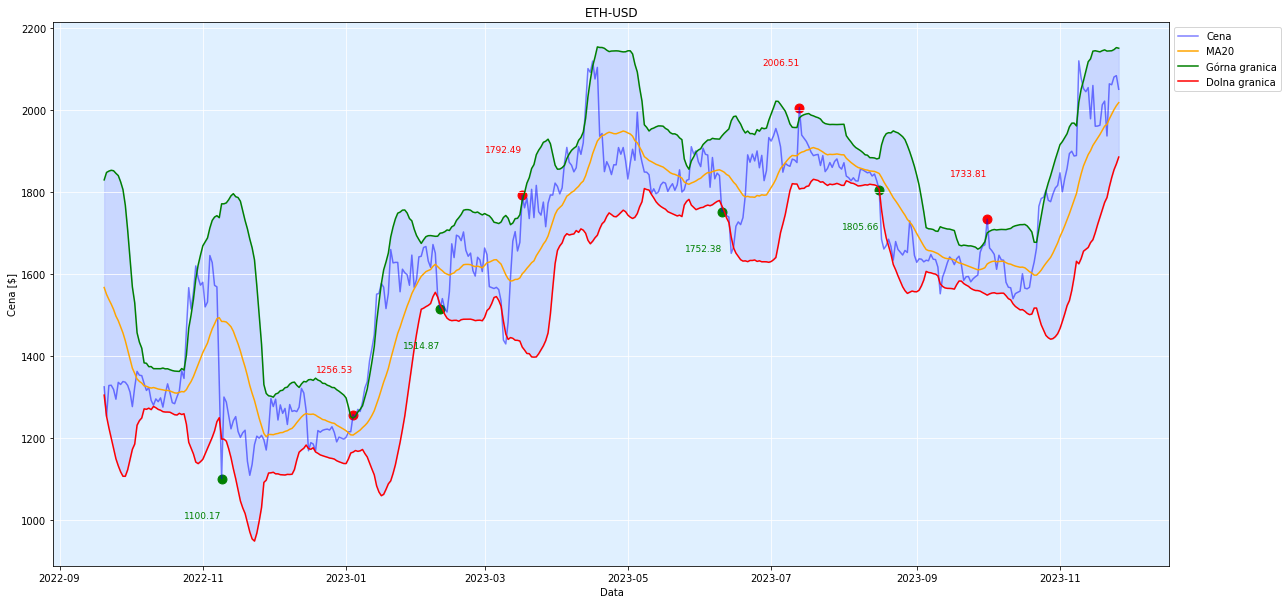

[*********************100%%**********************]  1 of 1 completed


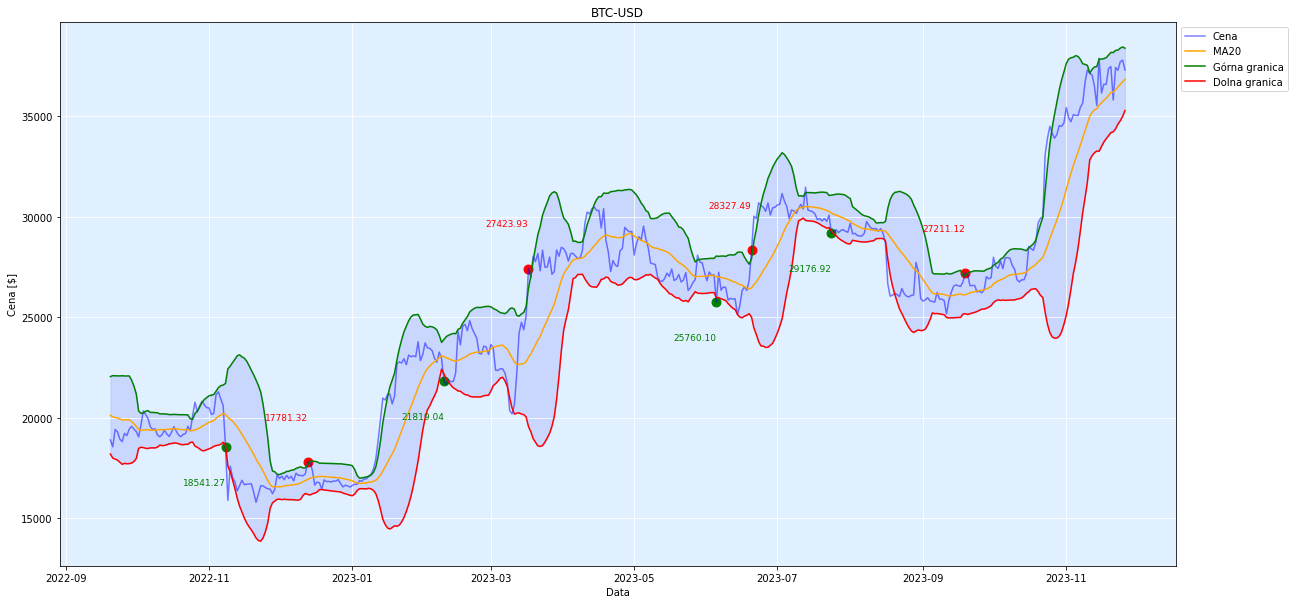

[*********************100%%**********************]  1 of 1 completed


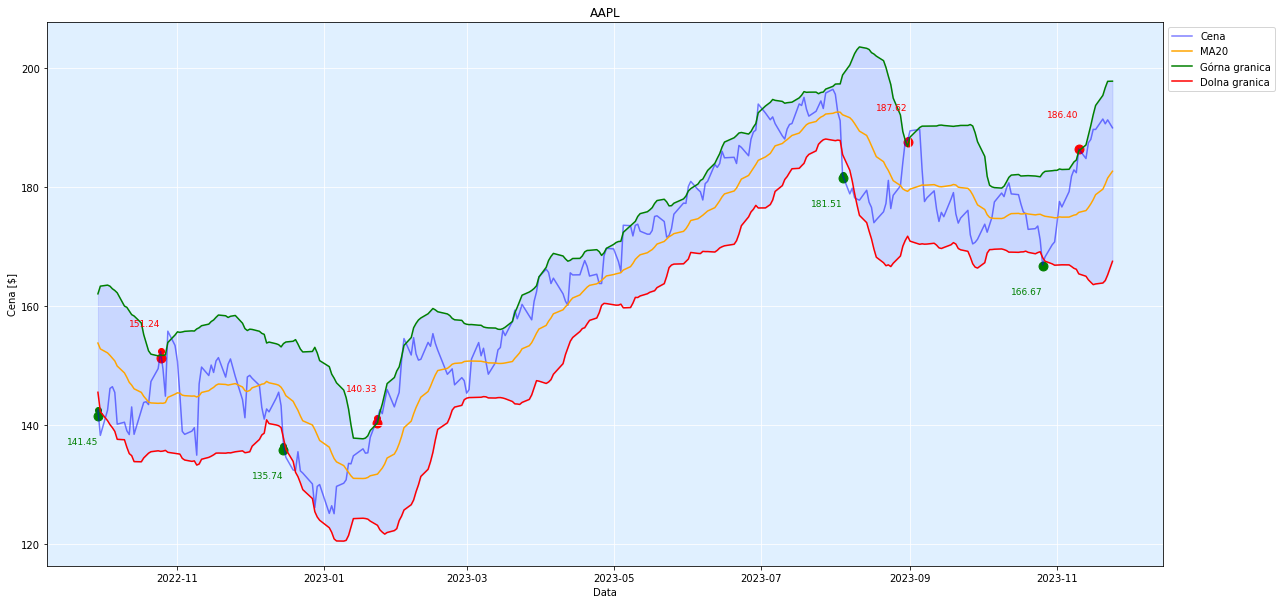

[*********************100%%**********************]  1 of 1 completed


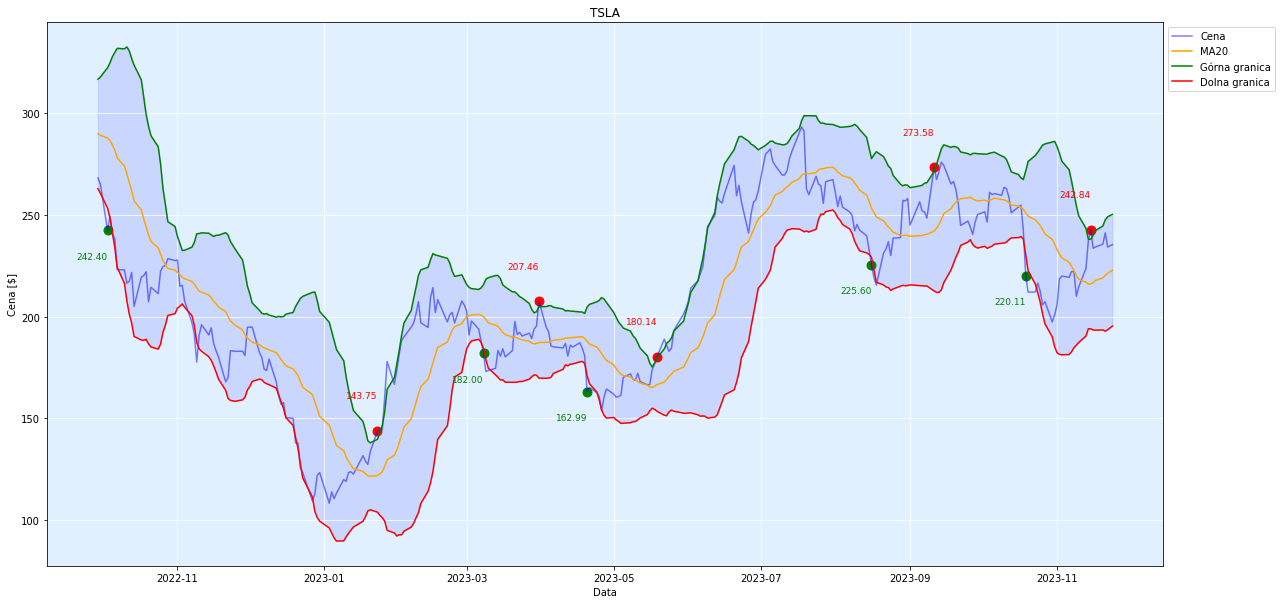

In [2]:
strategies.BoillingBands('ETH-USD', 100)
strategies.BoillingBands('BTC-USD', 2000)
strategies.BoillingBands('AAPL', 5)
strategies.BoillingBands('TSLA', 15)